# Data Exploration

In this phase, we dive into the dataset to understand the information it holds and how it's structured. Our goal is to get a feel for the data, identify what we want to predict, and pinpoint the features that might help us in predicting car prices.

The dataset that has been used is taken from Kaggle:
https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset
added a column 'company' to aid the use of the dataset.

1. Investigating the dataset structure and variables:

Our dataset consists of nine columns, each providing different details about cars. Let's take a closer look at each of them:

Company:
This column likely contains the name of the car manufacturing company. We'll explore the various companies present in the dataset to understand the distribution and prevalence of different brands.

Model Name:
The model name column provides information about the specific model of each car. We'll explore the variety of models available and check if certain models dominate the dataset.

Year:
The year column represents the manufacturing year of the cars. By examining the range and distribution of years, we can understand the temporal distribution of cars in our dataset.

Selling Price:
The selling price column is our target variable, indicating the price at which the cars were sold. We'll explore the distribution of selling prices to identify the range and potential outliers.

Kms Driven:
This column denotes the distance the car has been driven. We'll investigate the distribution of kilometers driven to understand the usage patterns of the cars in our dataset.

Fuel:
The fuel column likely specifies the type of fuel the cars use, such as petrol, diesel, or others. We'll explore the distribution of fuel types to identify the prevalence of different fuel categories.

Seller Type:
Seller type may indicate whether the seller is an individual or a dealer. We'll examine the distribution of seller types to understand who predominantly sells cars in our dataset.

Transmission:
This column likely represents the type of transmission the cars have, such as manual or automatic. We'll explore the distribution of transmission types to identify the most common transmission in the dataset.

Owner:
The owner column may provide information about the number of previous owners the cars have had. We'll investigate the distribution of the ownership variable to understand the history of ownership for the cars.

By conducting this exploration, we aim to gain insights into the dataset's characteristics and identify potential patterns or trends that could influence car prices. This initial understanding will guide our subsequent steps in data preprocessing, visualization, and modeling.

2. Identifying the target variable and features:

The variable we aim to predict is the "Car Price." This is the value we want our model to estimate. 
The features, on the other hand, are the characteristics of the cars that we believe might influence their prices. 


Since we are about to use quite a few machine learning models, there are a lot of libraries that we are importing. Using libraries make things easy as it is not needed to write the code of their functionality from scratch. Sometimes libraries are not installed when using a particular environment. Hence, care must be taken to install and download the libraries for the task at hand.

Pandas is a library that is used for data analysis. It also acts as a wrapper over Matplotlib and NumPy libraries. For instance, .plot() from Pandas performs a similar operation to Matplotlib plot operations.

Seaborn provides a high-level interface that is used to draw informative statistical plots.

NumPy is used for performing a wide variety of mathematical operations for arrays and matrices. In addition to this, the steps taken for computation from the NumPy library are effective and time-efficient.

Sklearn (Scikit-learn) is one of the most popular and useful libraries that is used for machine learning in python. It provides a list of efficient techniques and tools for machine learning and statistical modeling including classification, regression, clustering, and dimensionality reduction. As could be seen from the code above, there are various sub-packages from Sklearn used for machine learning purposes respectively.

Missingno is a really handy library for plotting the null values present in our data. Usually, datasets that are large come with missing values in them. Rather than manually finding those missing values, it would be really effective to plot the values to get the best results respectively.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

We would be using pandas to read the data. We would be storing that in a variable called 'data' for various calculations later.

In [2]:
data = pd.read_csv('car_data.csv')

In [3]:
data.shape

(4340, 9)

In [4]:
data.head()

,company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Data Visualization

In this phase, we leverage visualizations to gain insights into the distribution of the target variable (selling price) and explore relationships between this target variable and other features present in the dataset.

1. Countplot of Car Prices:
A countplot is a powerful tool to visualize the distribution of car prices. By dividing the price range into bins and counting the number of cars in each bin, we can understand the overall pattern. This visualization will reveal whether most cars fall within a specific price range or if there are notable outliers. Insights from this histogram will guide our understanding of the general pricing landscape. We would be using seaborn's countplot to check the total number of cars per company that we have in our dataset. 
We see that there are more than 1200 cars for the company 'Maruti' in our dataset. 

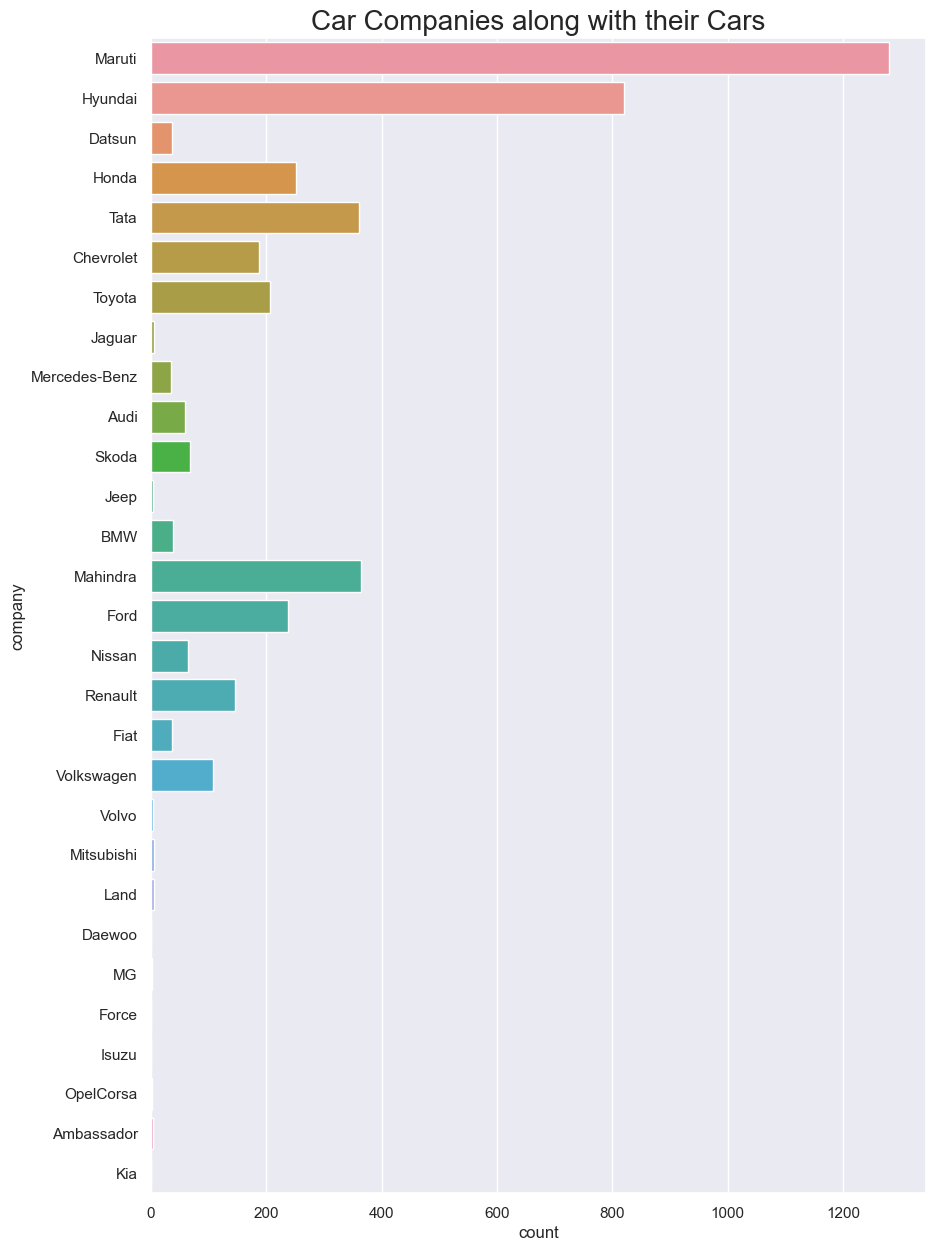

In [5]:
plt.figure(figsize = (10, 15))
sns.countplot(y = data.company)
plt.title("Car Companies along with their Cars", fontsize = 20)
plt.show()

2. Countplot of the total cars per different years :
We would be checking the total number of cars per year just to understand the data. We find that there are many cars in the years 2015 to 2017 compared to the other years in our dataset. From this visualization, we can get an understanding that most of our data contains recent values. This is a good dataset as we are more interested in the prices of the future cars. It would be better if we have the most recent values as they would help us well in our predictions.

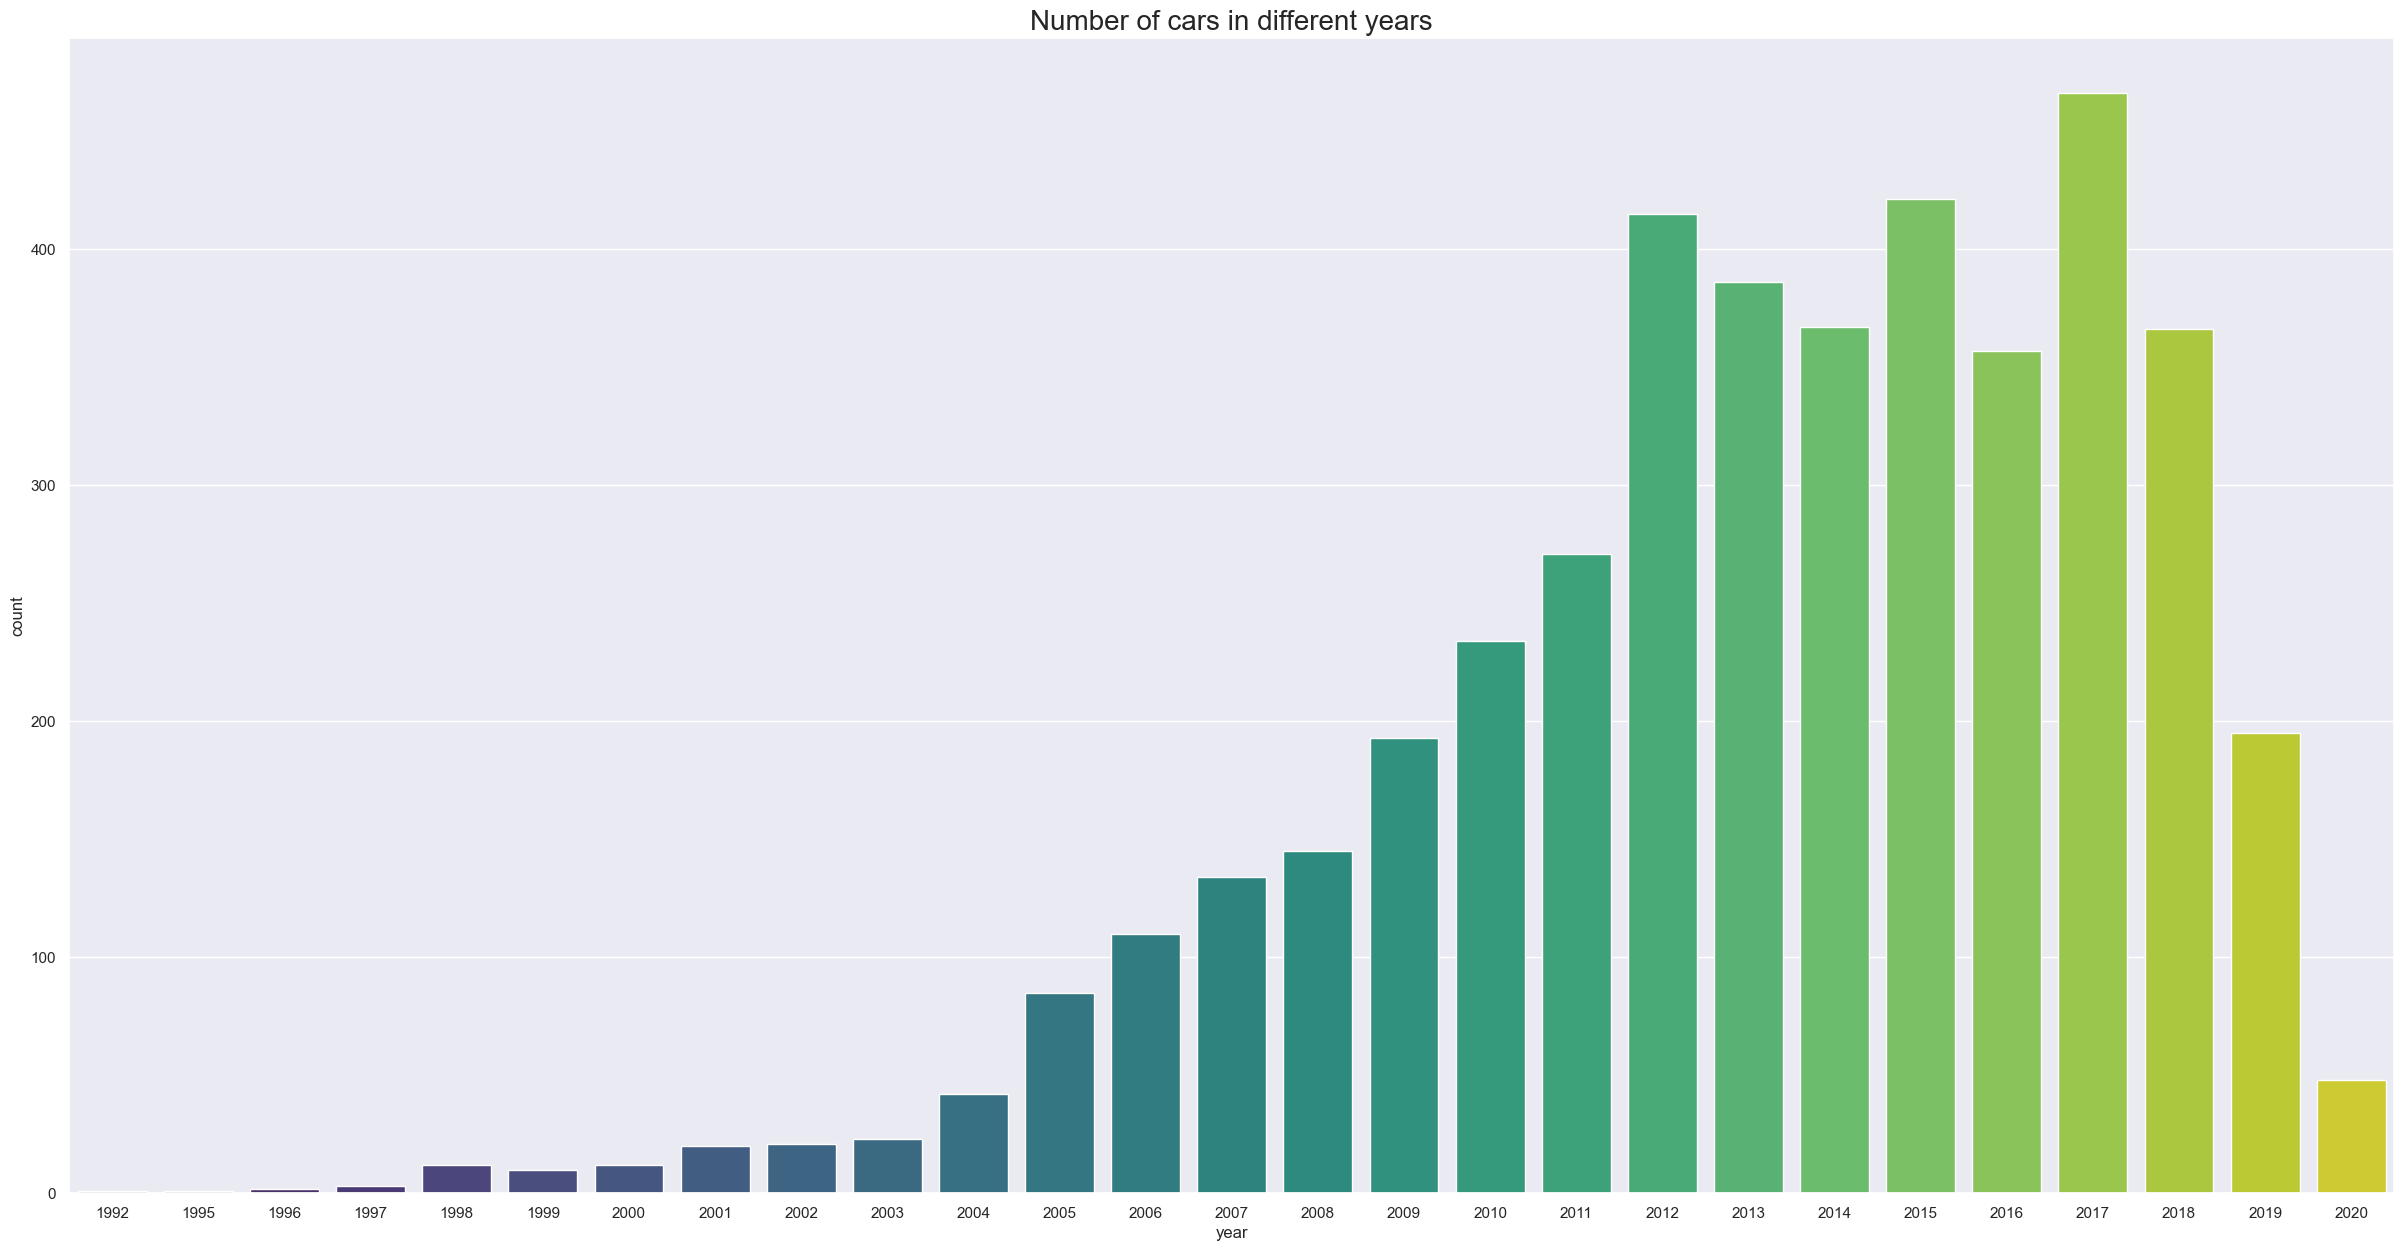

In [6]:
plt.figure(figsize = (30, 15))
sns.countplot(x=data.year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

As could be seen from the plot, our data accounts for the most recent cars without having a lot of cars that are quite old. This is good as our data accounts for the most recent prices of the cars rather than relying on the significantly past data.

3. Counting the cars based on transmission type:
We are all interested in cars that are automatic as they are really easy to handle and efficient. In addition to this, most of the manual cars are being replaced by automatic cars and thus, we don't have a lot of demand for manual cars. That is being reflected here in the dataset. We see that when we see the total number of cars based on transmission type, we find that there are many automatic cars as compared to the cars that are manual. Thus, we could see that most of the cars that we have chosen in our dataset are automatic.

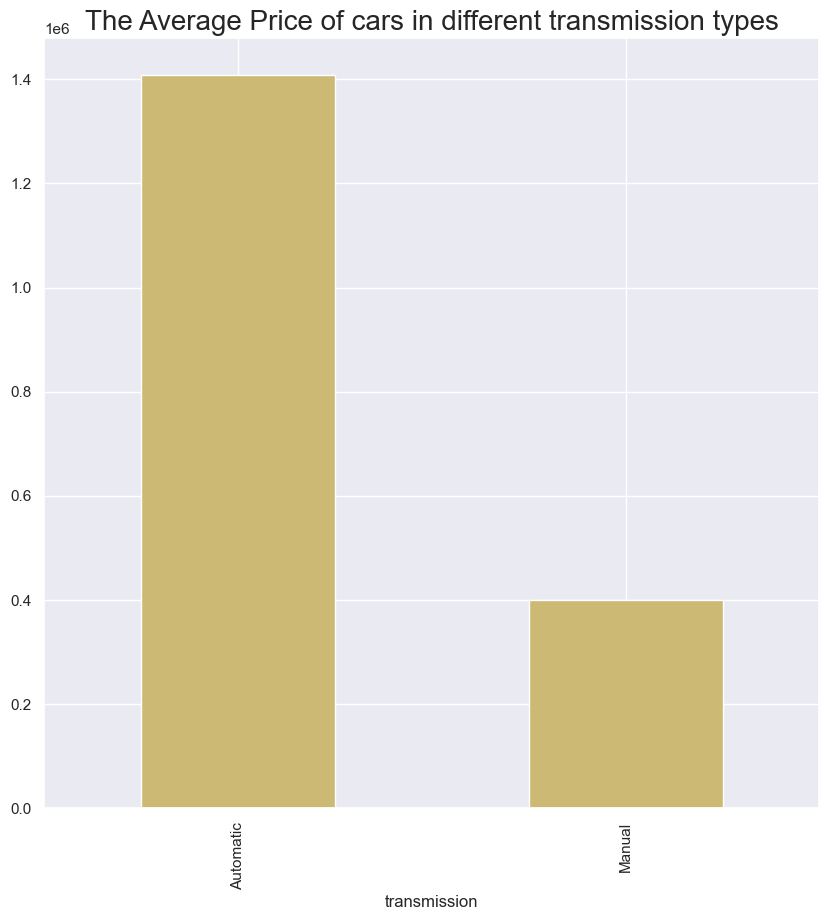

In [23]:
plt.figure(figsize = (10, 10))
data.groupby('transmission')['selling_price'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different transmission types", fontsize = 20)
plt.show()

4. Countplot of Fuel Type:
We would be counting the total number of values for 'fuel' feature. We see that there are more than a majority of cars that have 'Diesel' as their category. Apart from this, there are other categories such as 'Petrol' which could also be taken into consideration. Moreover, we have a few few cars that are electric in our data. That is what is expected as in real-life, considering as they are still expensive comapred to others.

<Axes: xlabel='count', ylabel='fuel'>

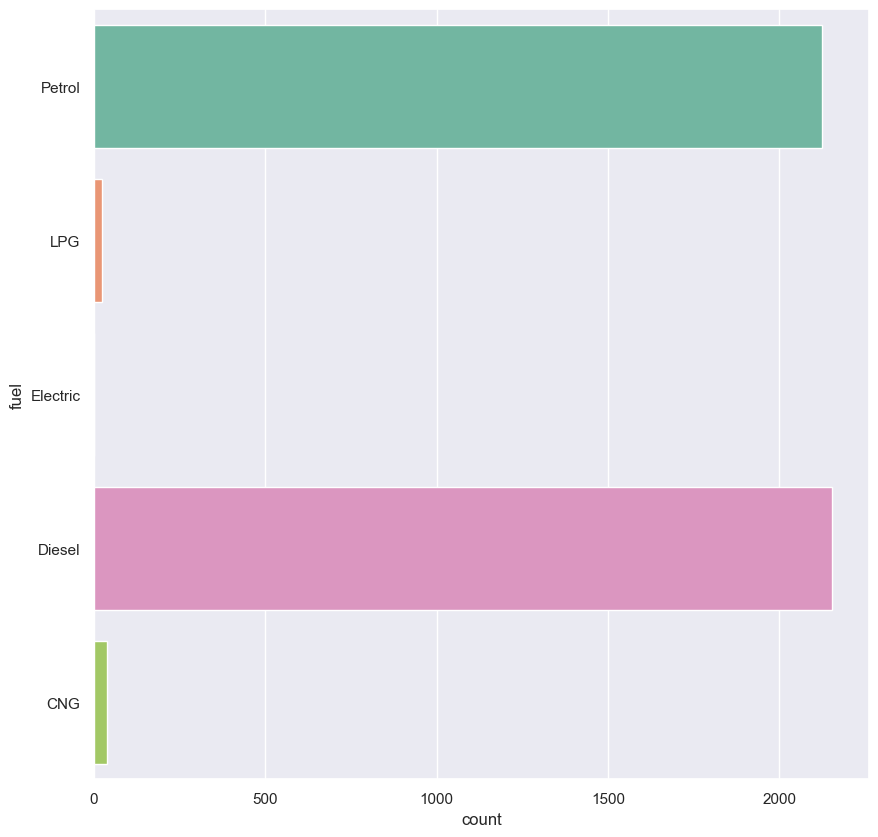

In [8]:
plt.figure(figsize = (10,10))
sns.countplot(y = data['fuel'].sort_values(ascending = False), palette = 'Set2')

Grouping on the basis of 'year' with 'selling_price' values:
We would now be grouping the data on the basis of year and check the average prices of cars for the years of cars. Looking at the plot below, we see that the average prices of cars was the highest in the year 2019 followed by the year 2018. The average prices of cars of 2005 and below are pretty low as can be easily seen from the plot. On average, we also find an interesting trend. As the years increase, we could see that the average prices of cars keep increasing kind of in a steady way.

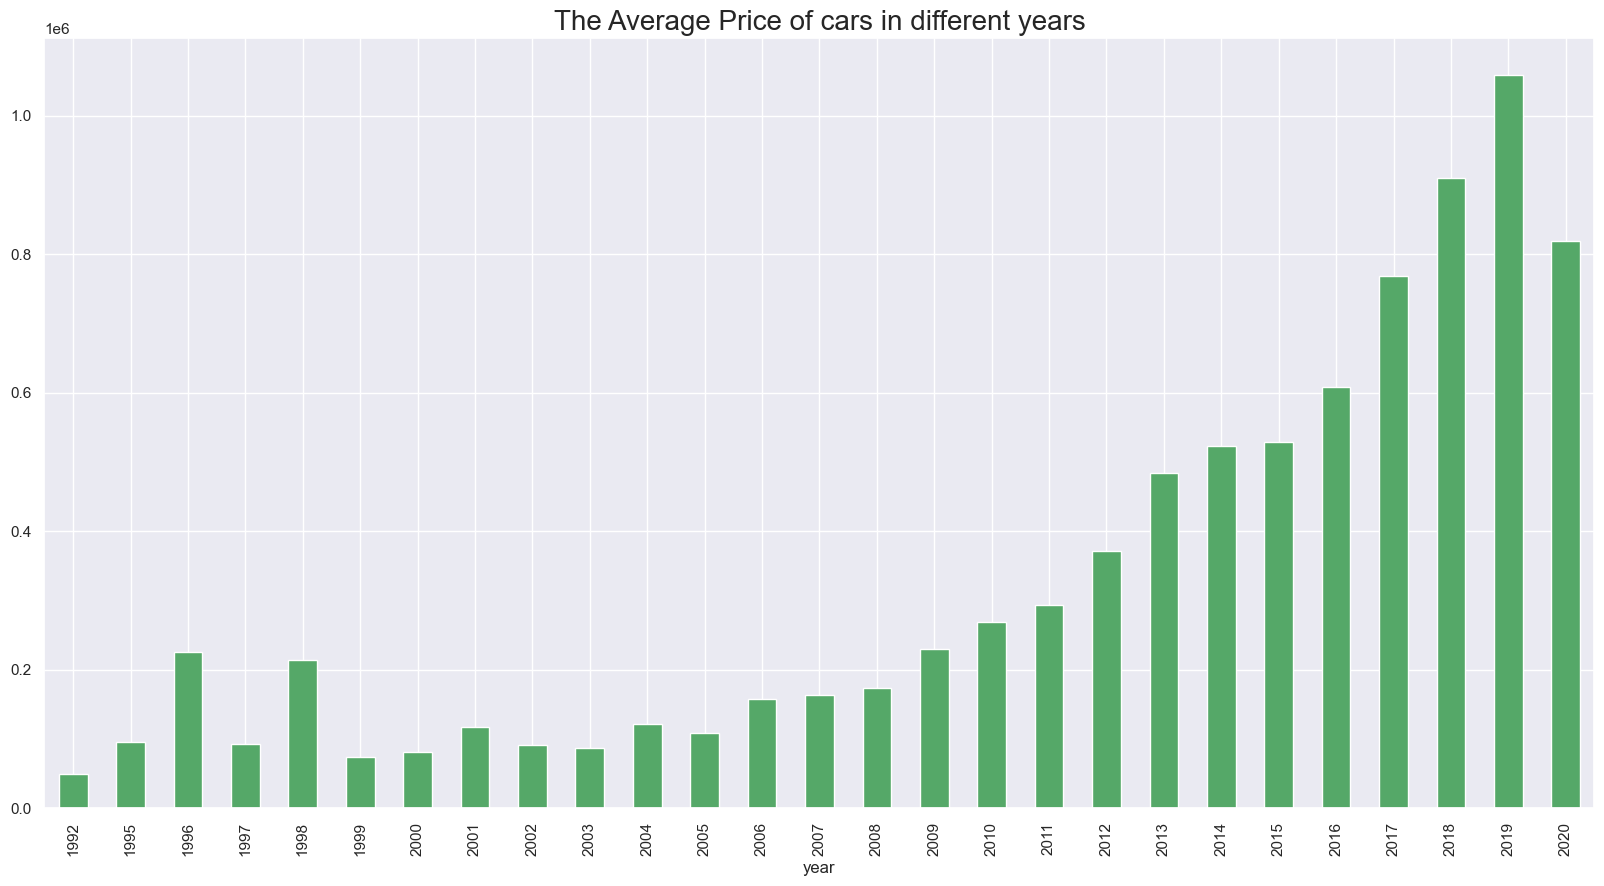

In [24]:
plt.figure(figsize = (20, 10))
data.groupby('year')['selling_price'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

Grouping on the basis of 'company' with 'selling_price' values:
We would now be grouping on the basis of make and check the average prices of cars of particular makes. Highest average is of Land after that in line we have BMW.

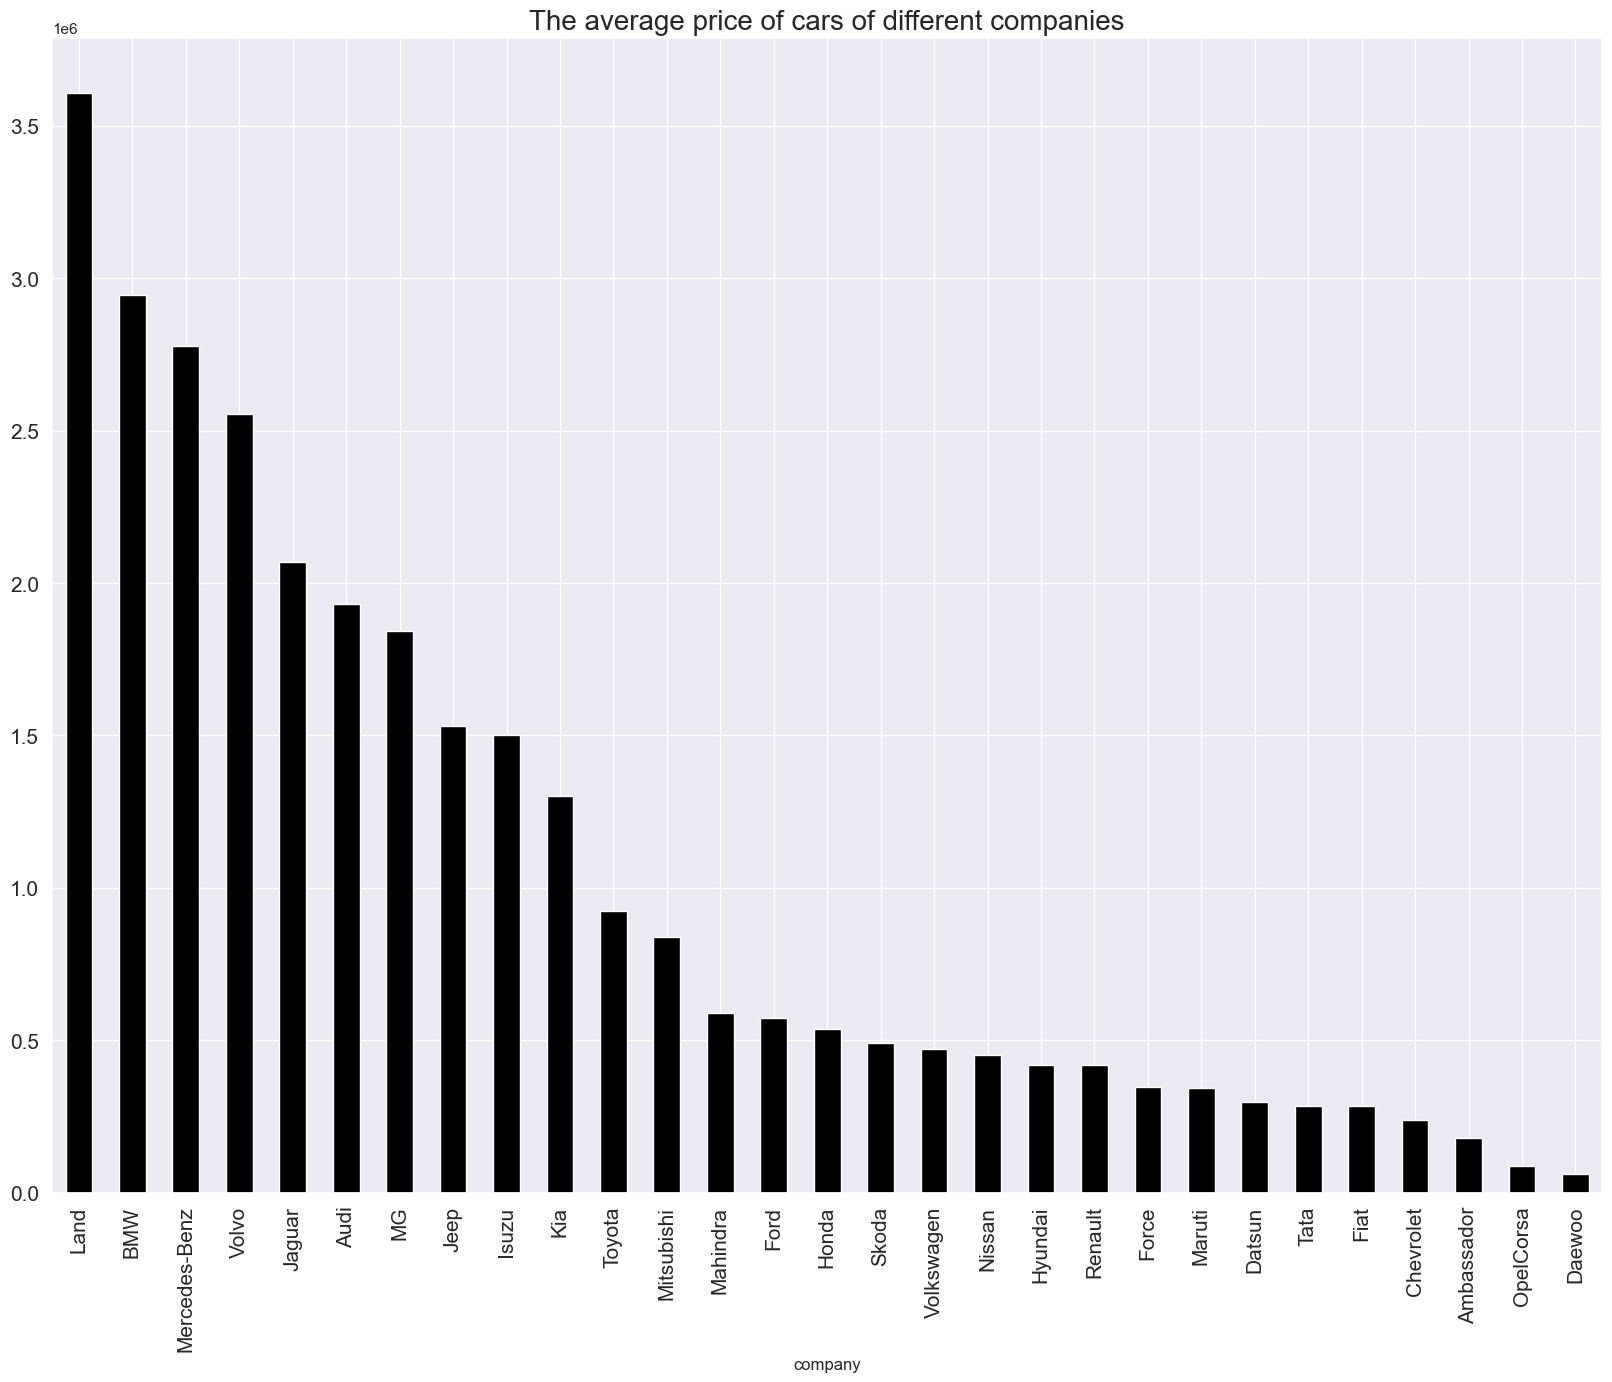

In [25]:
plt.figure(figsize = (20, 15))
data.groupby(['company']).mean()['selling_price'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

# Data Preprocessing 

In the data preprocessing phase, our primary focus is on preparing the dataset for effective analysis and modeling. This involves addressing missing values, handling outliers, and converting categorical variables into a format suitable for machine learning algorithms.

1. Handle missing values and outliers appropriately.

In [27]:
# checking the number of missing values
data.isnull().sum()

company          0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

2. Convert Categorical Variables into Numerical Representations : 
Most machine learning models work with numerical data, so we need to convert categorical variables into a format that the computer can comprehend. For instance, the 'Fuel' column may contain categories like 'Petrol' or 'Diesel.' We'll employ techniques such as label encoding to represent these categories as numbers. This allows the model to incorporate categorical information into its calculations.

In [28]:
# checking the distribution of categorical data
print(data.fuel.value_counts())
print(data.seller_type.value_counts())
print(data.transmission.value_counts())
print(data.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [29]:
#Encoding the Categorical Data

# encoding "Fuel" Column
data.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4 }},inplace=True)

# encoding "Seller_Type" Column
data.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding "Transmission" Column
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner" Column
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [30]:
data.head()

,company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


By addressing missing values, handling outliers, and converting categorical variables, we ensure that our dataset is clean and ready for the subsequent stages of analysis. This preprocessing step lays the foundation for accurate model training and robust predictions.

# Feature Selection

Selecting the right features is crucial for building an accurate and efficient predictive model for car prices. We employ feature selection techniques to identify and justify the inclusion of relevant features in our analysis. One common method for this purpose is correlation analysis, which helps us understand the relationships between different features and the target variable (selling price).

<Axes: >

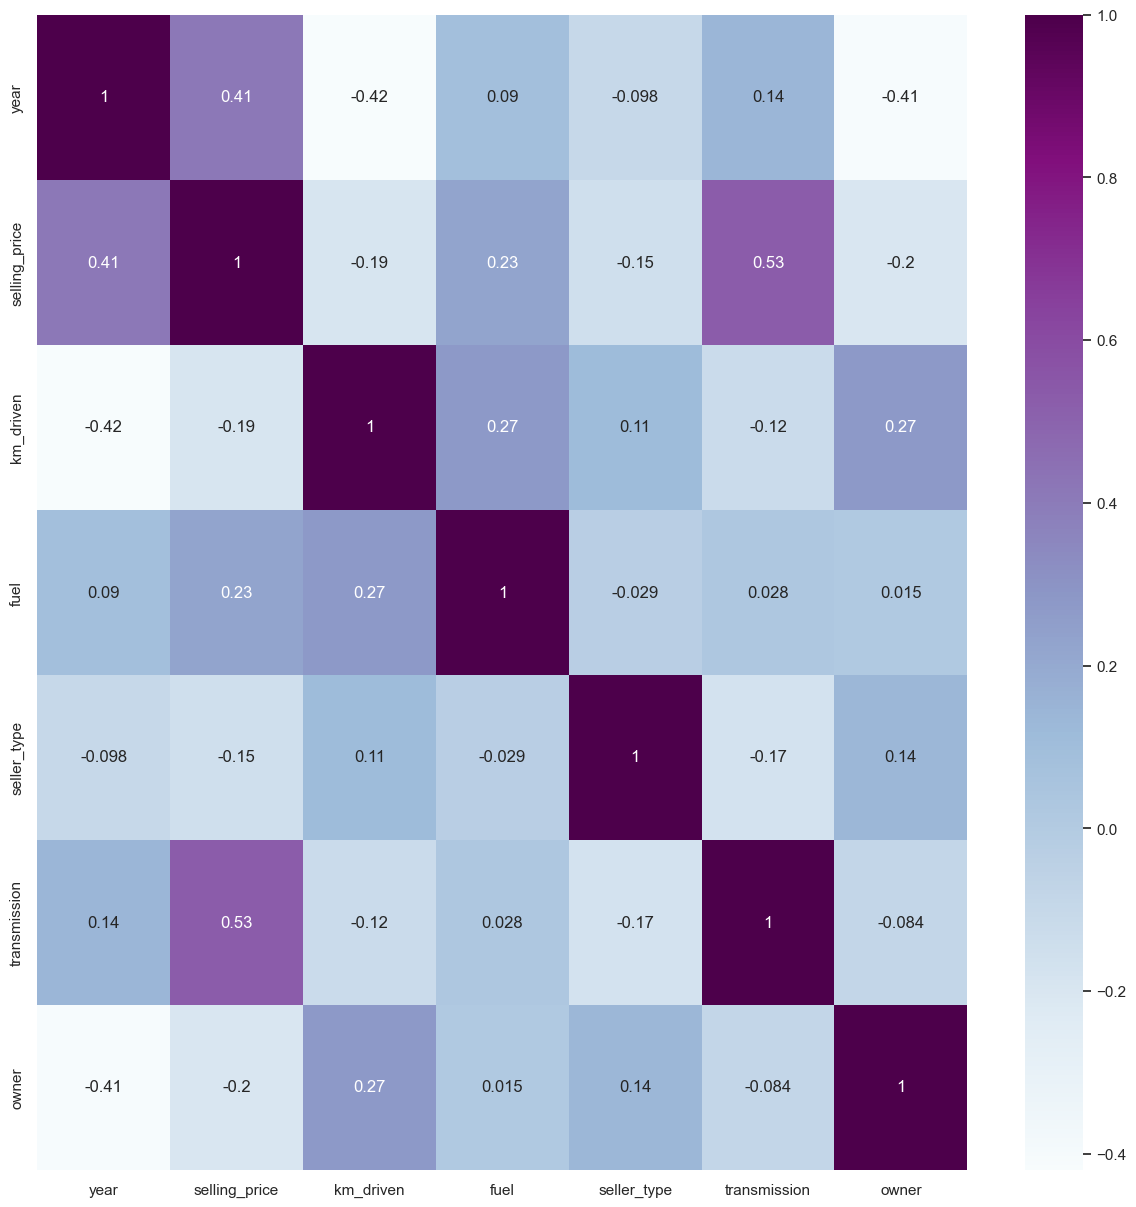

In [31]:
plt.figure(figsize = (15, 15))
numeric_columns = ['year', 'selling_price', 'km_driven','fuel','seller_type','transmission','owner']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

Heatmap is useful under the Seaborn library. It gives us a good colored estimate of the values. Depending on the palette chosen, we either get bright images for higher values or vice-versa. We are plotting a correlation plot between the various features.

It is seen that the ‘selling_price’ and ‘transmission’ are better correlated to each other if not the best with a correlation coefficient being equal to 0.53. Similarly, the features ‘selling_price’ and ‘year’ are also related. All the remaining features seem to be related in a negative way or uncorrelated.

The values of the correlation coefficient lie between the range -1 to 1 respectively. The higher the positive correlation between the features, the more would be correlation coefficient value would move to 1. The higher the negative correlation between the features, the more would the correlation coefficient value move to -1 respectively.

{Justification for Feature Selection}:

Our goal in selecting features is to build a model that is both accurate and interpretable. By choosing features with strong correlations with the selling price, we increase the model's predictive power. Additionally, considering domain knowledge ensures that we capture relevant factors that might not be fully reflected in the correlation coefficients.

# Model Building

In this phase, we embark on constructing a predictive model for car prices based on our dataset. The process involves splitting the data into training and testing sets to ensure the model's effectiveness and selecting a suitable regression model, such as linear regression, for training.

1. Manipulation of Data: 
Now, it is time to manipulate the data and convert it in the forms where we could give it for the machine learning models for predictions. We use various libraries in python such as shuffle that are used to choose various data values that would later be given to the machine learning models. There is a requirement to also encode the text information that is present so that those values are converted to mathematical vectors that would ensure that they would be understood by the algorithms respectively.

2. Shuffling the data: 
Most of the machine learning projects that I've seen do not make use of shuffle feature in python. It is very important to shuffle the data randomly so that we get outputs differently and we would be dealing with data without any particular order or a particular timeframe.

3. Splitting the Dataset: 
We would be dividing the data into training data and testing data. Since we have a lot of data points, it would be better to randomly divide the data so that the test set just contains 20 percent of the values. Since the total number of data points that we have taken into consideration are about 10000, it would be wise to divide the training and testing set in the ratio 80:20 percent. In general, we would be diving the training and testing set so that the value that is present in the training set is about 30 percent of the total data

In [32]:
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['selling_price'], axis = 1)
y = shuffled_data['selling_price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [34]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (3472, 8)
The size of the output train data is: (3472,)
The size of the input test data is: (868, 8)
The size of the output test data is: (868,)


4. Encoding the remaining data: 
When we are doing any machine learning applications, it is important to encode the data so that we would be able to convert the data in the form of categorical features so that we would be working on the data that is mathematical rather than categorical. Therefore, we would be converting the categorical feature into numerical features so that we are going to be using the mathematical vectors for our machine learning applications.

There are different encoding techniques that we would be taking into consideration and we are making sure that we get the best output values associated with each of them.

In [35]:
encoder = TargetEncoder(cols = 'year')

In [36]:
X_train.head()

,company,name,year,km_driven,fuel,seller_type,transmission,owner
295,Chevrolet,Chevrolet Spark 1.0 LT,2012,28000,0,1,0,0
1308,Maruti,Maruti Swift Dzire VDI,2013,110000,1,1,0,1
2697,Maruti,Maruti Eeco 5 Seater AC BSIV,2018,25000,0,1,0,0
2048,Hyundai,Hyundai Verna 1.6 SX CRDi (O),2013,110000,1,1,0,2
451,Maruti,Maruti Swift VDI,2012,80000,1,1,0,1


In [37]:
encoder.fit(X_train['year'], y_train.to_frame()['selling_price'] )

TargetEncoder(cols=['year'])

In [38]:
X_train['year'] = encoder.transform(X_train['year'])

In [39]:
X_test['year'] = encoder.transform(X_test['year'])

In [40]:
X_train.head()

,company,name,year,km_driven,fuel,seller_type,transmission,owner
295,Chevrolet,Chevrolet Spark 1.0 LT,371851.894260,28000,0,1,0,0
1308,Maruti,Maruti Swift Dzire VDI,487868.006803,110000,1,1,0,1
2697,Maruti,Maruti Eeco 5 Seater AC BSIV,917068.225255,25000,0,1,0,0
2048,Hyundai,Hyundai Verna 1.6 SX CRDi (O),487868.006803,110000,1,1,0,2
451,Maruti,Maruti Swift VDI,371851.894260,80000,1,1,0,1


In [41]:
encoder = TargetEncoder(cols = 'name')
encoder.fit(X_train['name'], y_train.to_frame()['selling_price'])
X_train['name'] = encoder.transform(X_train['name'])
X_test['name'] = encoder.transform(X_test['name'])

In [43]:
X_train.head()

,company,name,year,km_driven,fuel,seller_type,transmission,owner
295,Chevrolet,436787.648091,371851.894260,28000,0,1,0,0
1308,Maruti,510113.362913,487868.006803,110000,1,1,0,1
2697,Maruti,465224.670407,917068.225255,25000,0,1,0,0
2048,Hyundai,501787.352697,487868.006803,110000,1,1,0,2
451,Maruti,443486.812758,371851.894260,80000,1,1,0,1


In [44]:
encoder = TargetEncoder(cols = 'company')
encoder.fit(X_train['company'], y_train.to_frame()['selling_price'])
X_train['company'] = encoder.transform(X_train['company'])
X_test['company'] = encoder.transform(X_test['company'])

In [45]:
X_train.head()

,company,name,year,km_driven,fuel,seller_type,transmission,owner
295,239168.340285,436787.648091,371851.894260,28000,0,1,0,0
1308,340029.795367,510113.362913,487868.006803,110000,1,1,0,1
2697,340029.795367,465224.670407,917068.225255,25000,0,1,0,0
2048,413381.845092,501787.352697,487868.006803,110000,1,1,0,2
451,340029.795367,443486.812758,371851.894260,80000,1,1,0,1


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 295 to 1412
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       3472 non-null   float64
 1   name          3472 non-null   float64
 2   year          3472 non-null   float64
 3   km_driven     3472 non-null   int64  
 4   fuel          3472 non-null   int64  
 5   seller_type   3472 non-null   int64  
 6   transmission  3472 non-null   int64  
 7   owner         3472 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 244.1 KB


5. Standardization and Normalization of data: 
We would be considering the values of our data and perform some operations such as standardization and normalization before giving the data to the machine learning algorithms. We would be transforming the features that are present in the data and convert the values using the minmaxscaler respectively.

In [47]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [48]:
X_train_new.shape

(3472, 8)

We would create an empty list and we would be appending the values later so that we can analyze different machine learning algorithms for deployment.

In [49]:
error_mean_square = []
error_mean_absolute = []

6. Choosing a Regression Model:
Selection of Linear Regression - 
Linear regression is a fundamental and interpretable regression model that assumes a linear relationship between the features and the target variable. For predicting car prices, it's a logical starting point. The model assumes that changes in the target variable are proportional to changes in the input features, making it a suitable choice for our analysis.

In [50]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [51]:
y_predict = model.predict(X_test_new)

In [52]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [53]:
error_mean_absolute

[182151]

In [54]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [55]:
y_predict.head()

,Predicted Output
0,386473.517598
1,545212.928915
2,-36409.592074
3,741251.120897
4,740873.717087


In [56]:
y_test.to_frame().head()

,selling_price
2391,110000
45,625000
1930,250000
1280,580000
2700,355000


In [57]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [58]:
training_data_prediction = model.predict(X_train)

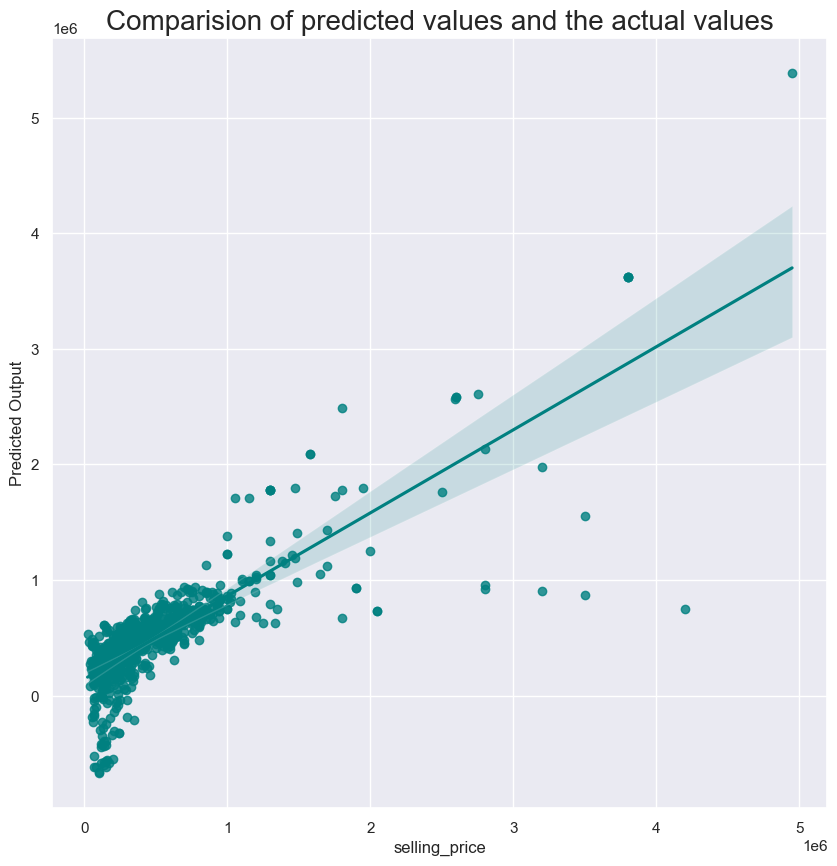

In [59]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We see that the linear regression model is doing quite well in terms of its prediction of the prices. Let us also go over the other models that would improve the results.

We would now be working with a new machine learning model called support vector regressor. We would be plotting the regplot and understand the predictions.

In [60]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

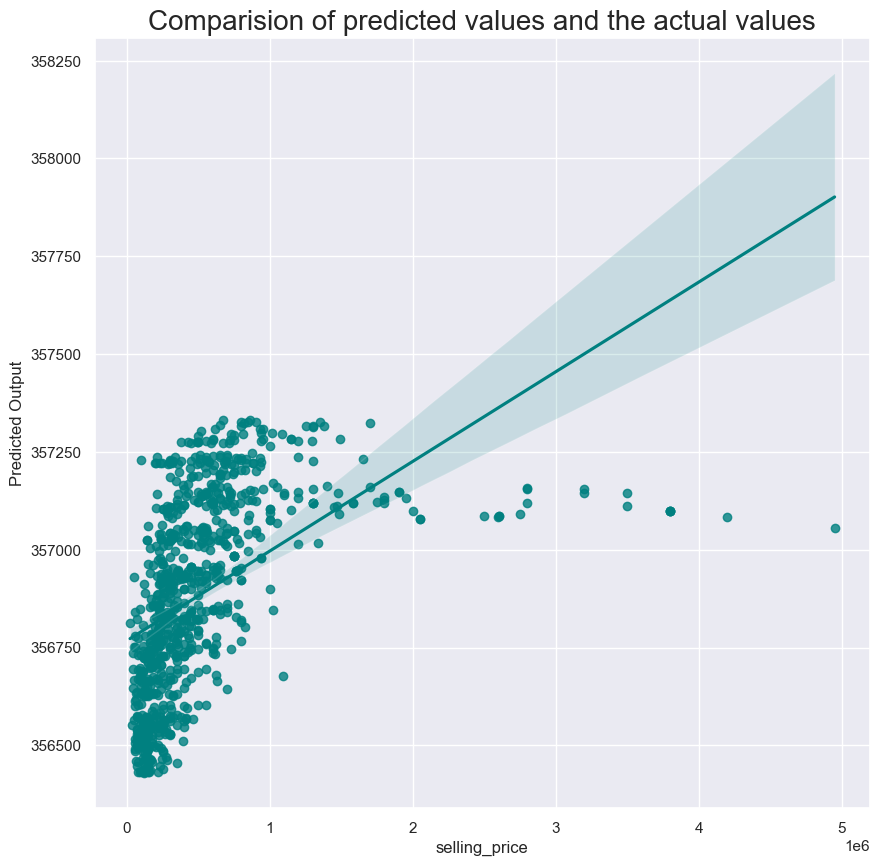

In [61]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

This plot clearly indicates that the model is not performing better than the Linear Regression model as the points between the prediction and the actual values are quite scattered from the line. Let us also use many other models and select the best model.

In [62]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

We would be using the knn regressor and understand the output. We would be drawing a regplot to get an understanding of how the data is spread out.

In [63]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

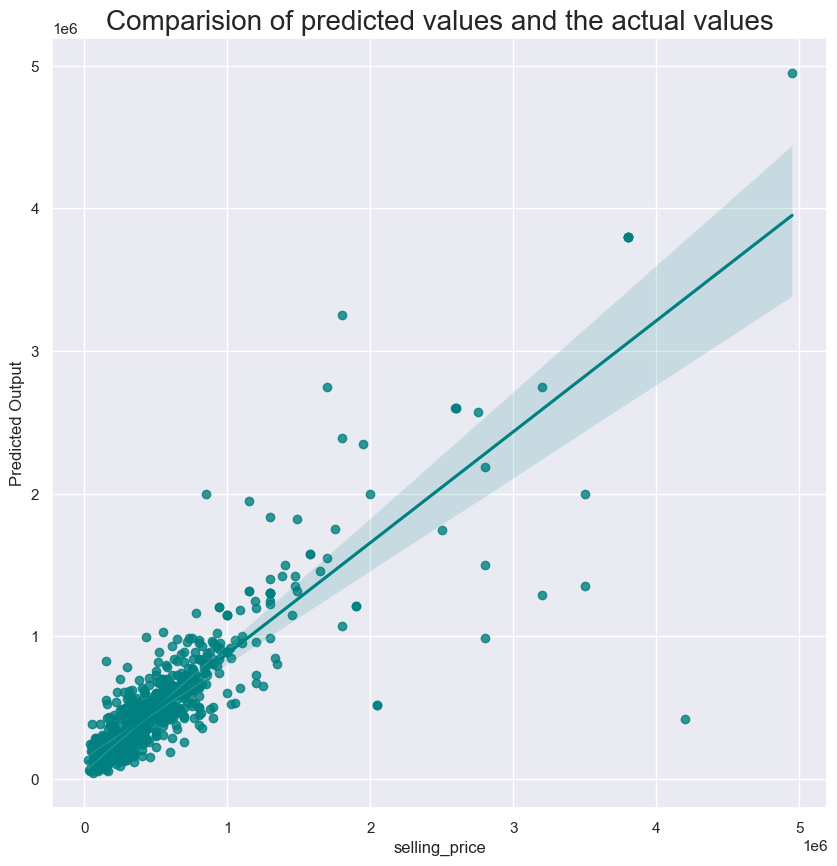

In [64]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be making use of the regplot again and plotting the predicted values and the actual predicted output values. We see that K - Neighbors Regressor did well in the testing set as compared to Support Vector Regressor respectively. We see that most of the predictions are close to the actual outputs in the plot.

In [65]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

We would making use of decision tree regressor and make the split to be random. We would be fitting the training data to it and make the predictions later for the test data to get an understanding of how the algorithm did in the test set.

In [66]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

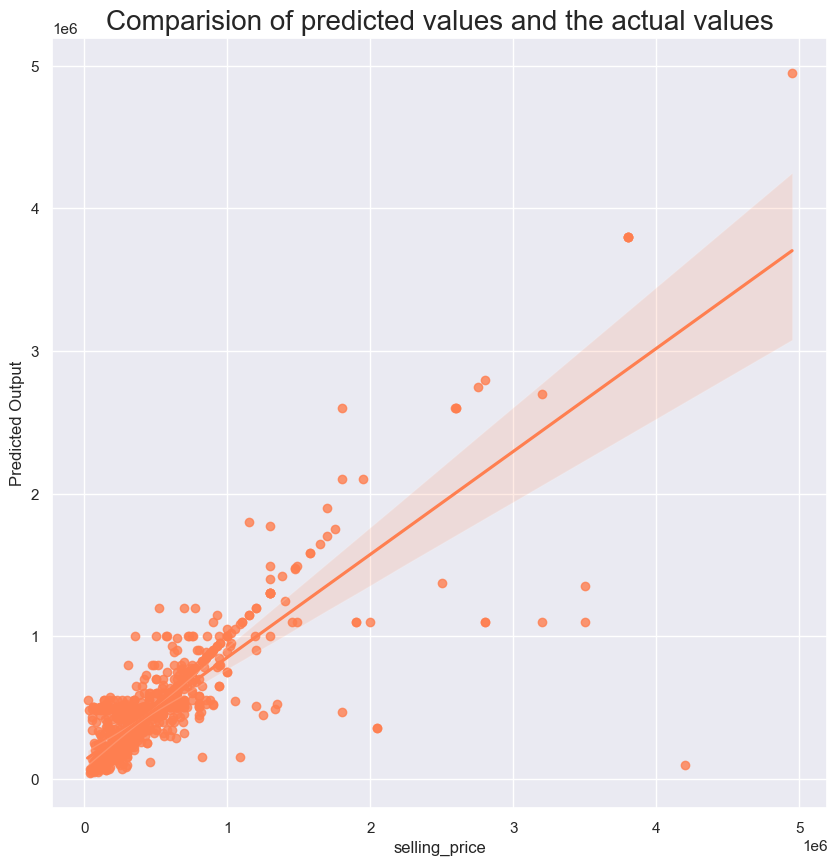

In [67]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We see that decision tree regressor also does a very good job of predicting the right outputs for the test inputs. Therefore, this model can be deployed in production. In additon to this, we have to do the hyperparameter tuning so that we would be able to get the best output for this model.

In [68]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

We would be making use of gradient boosting regressor respectively. We would follow the same procedure of traning the data and getting test output and see how well the model did on the test set. 

In [69]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

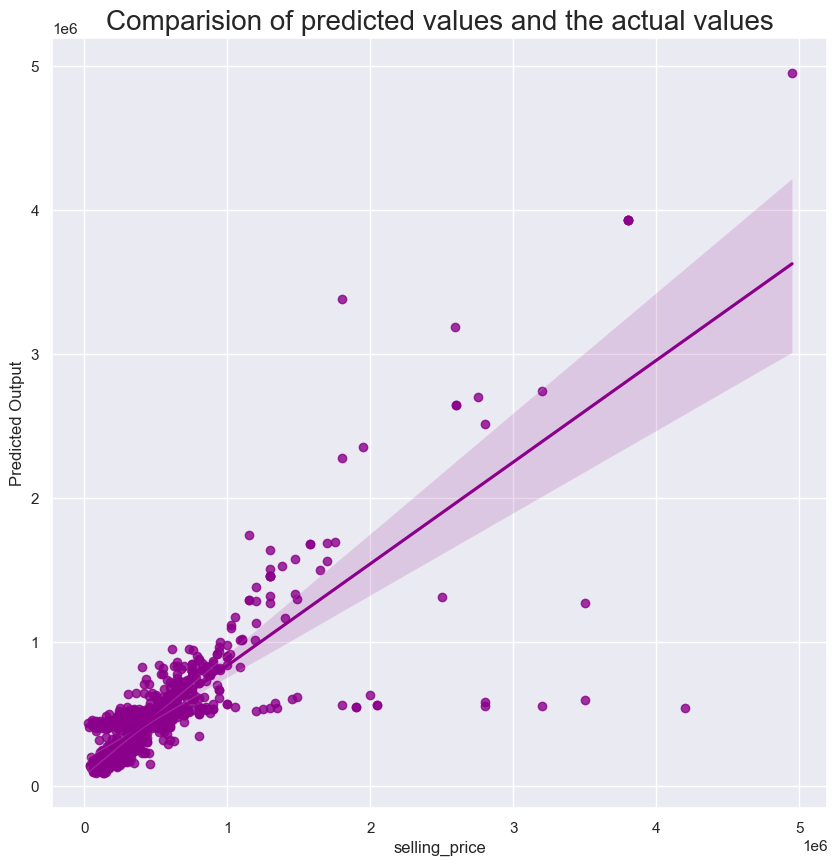

In [70]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We see that the gradient boosting regressor also did a fine job in getting the most accurate predictions. There could be a few outliers in the predictions but they are few in number. Most of the points were accurately predicted with small errors in them. Therefore, this is also a good model that could be used for predictions.

In [71]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

We would make use of the MLP Regressor which is the neural network for predictions. We would be taking into account 50 hidden layer sizes and an alpha values equal to 0.001 respectively.

In [72]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

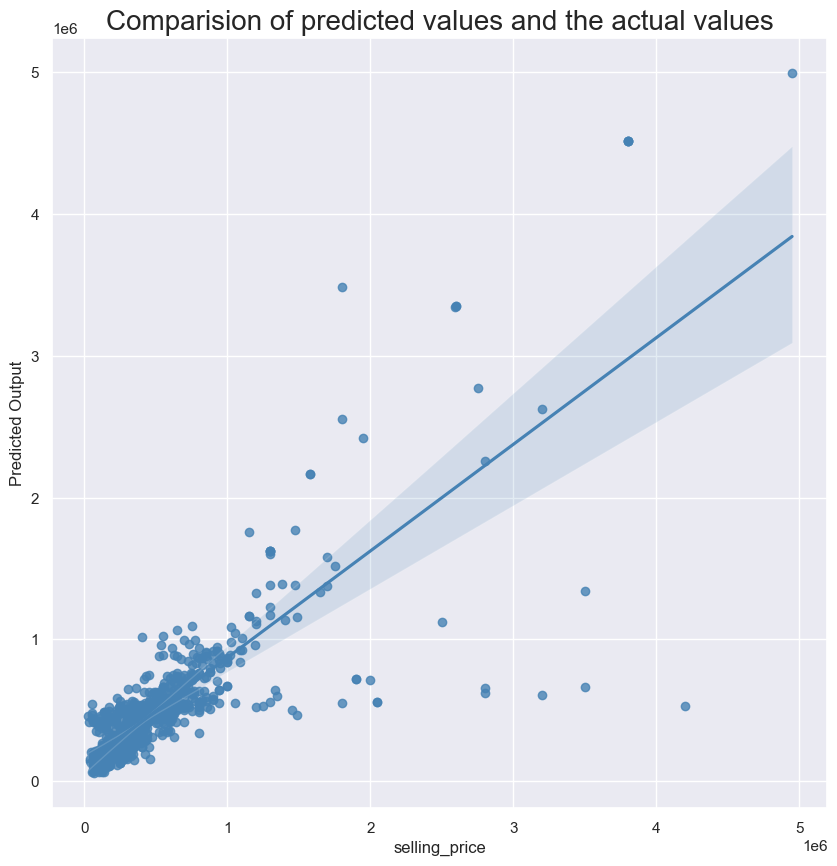

In [73]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'selling_price', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

We would be using the MLP regressor scatterplot and plot the actual output values with the predicted output values respectively so that we get a good understanding of the machine leanring model. We can see that this model also does a very fine job in predicting the outputs. Therefore, we would have to now plot the mean square error and mean absolute error of the different machine learning algorithms that we have used till now and understand those values. Based on those values, we can further conclude the best machine learning model is the best model for this dataset and conclude our understanding respectively.

In [74]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [75]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

In [76]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,182151,95921662170
1,Support Vector Regressor,301113,309076488744
2,K Nearest Regressor,115718,67248191409
3,Decision Tree Regressor,120292,82017401002
4,Gradient Boosting Regressor,132611,91443743824
5,MLP Regressor,145457,97817839711


We would be making use of the mean absolute error and understand the data fully. 

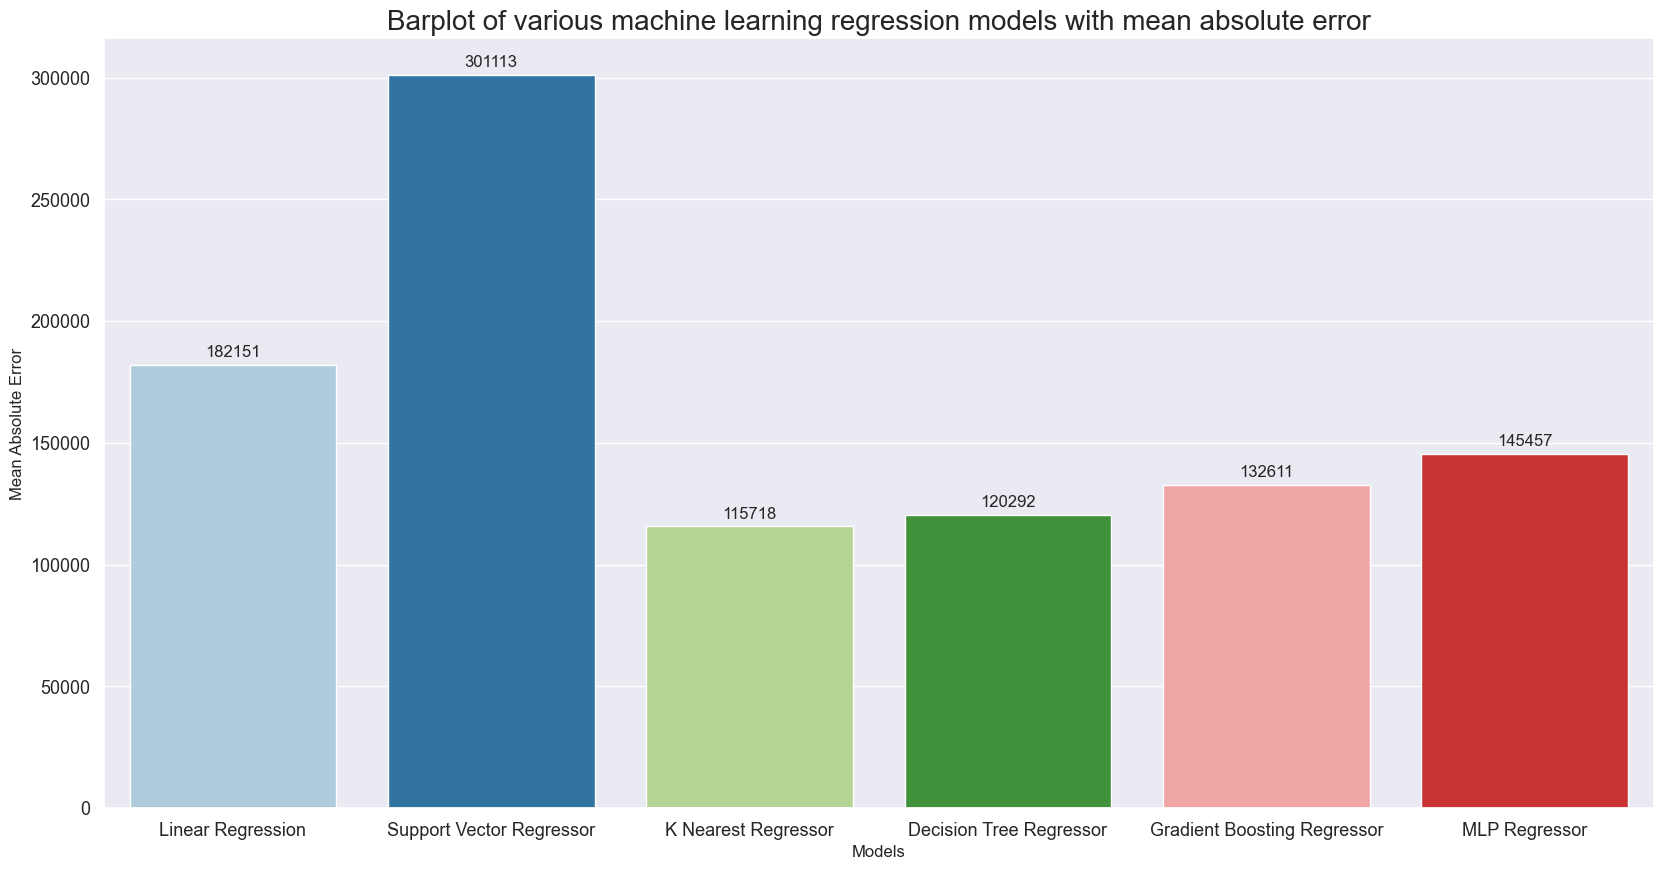

In [77]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

We would now be plotting the barplot of various machine learning models by taking into consideration the mean squared error respectively. 

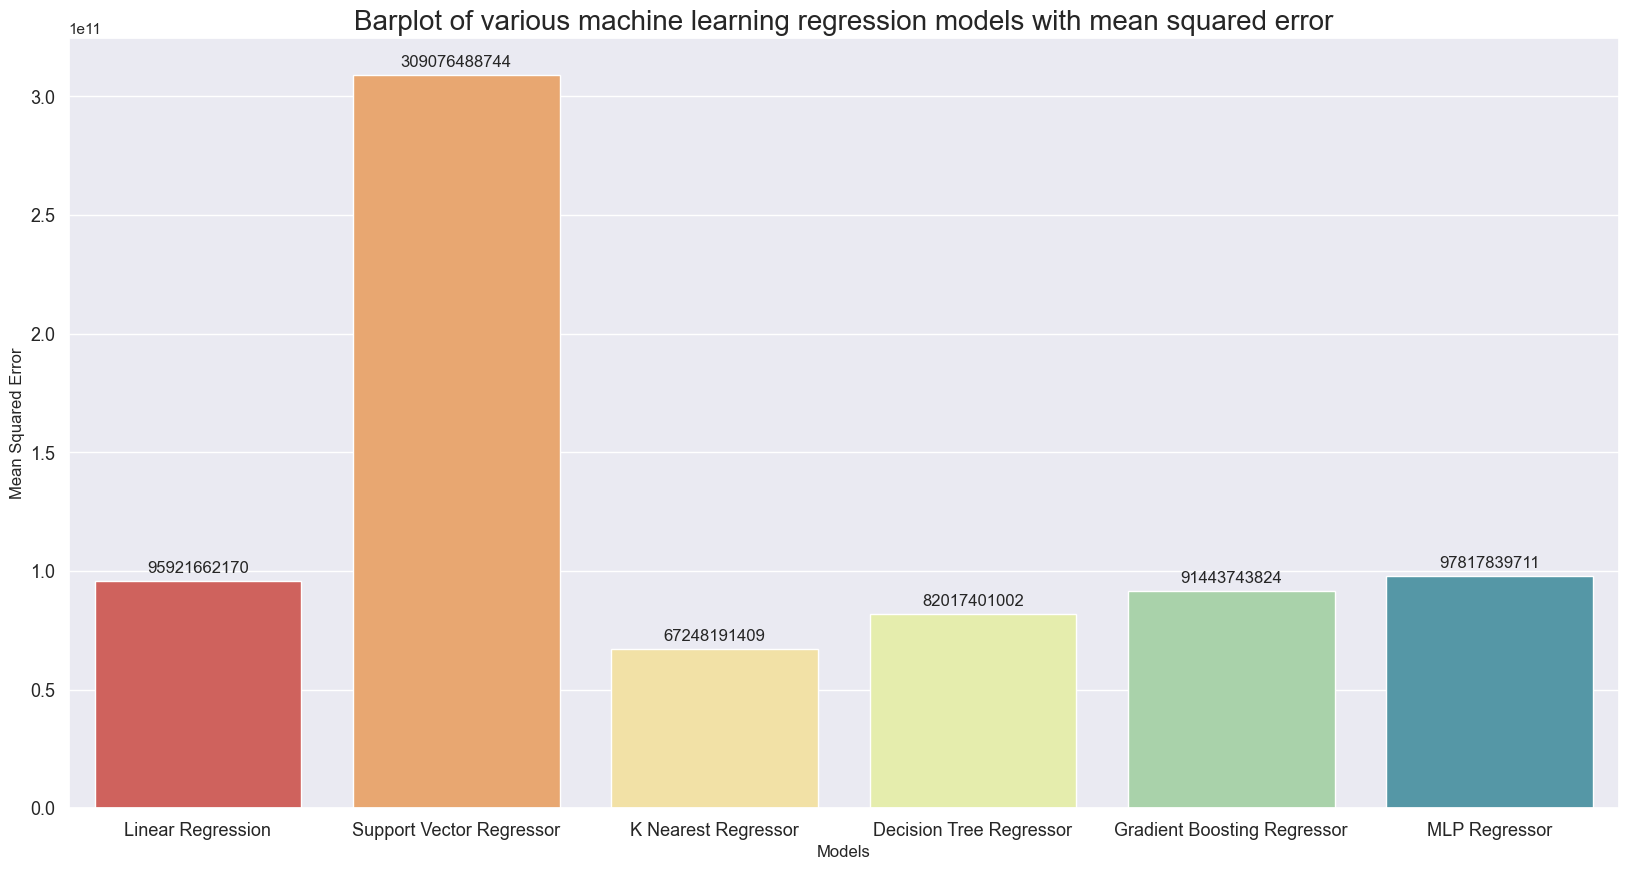

In [78]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()

# Model Evaluation

1. Evaluation Metrics:
In evaluating the performance of various machine learning models on a given dataset, two commonly used metrics are the Mean Absolute Error (MAE) and Mean Squared Error (MSE). These metrics help quantify the accuracy and precision of a model's predictions. Let's analyze the performance of the different models based on the provided MAE and MSE values.

Here is a summary of the performance metrics for each model:

Linear Regression:

MAE: 182151
MSE: 95921662170

Support Vector Regressor:

MAE: 301113
MSE: 309076488744

K Nearest Regressor:

MAE: 115718
MSE: 67248191409

Decision Tree Regressor:

MAE: 120292
MSE: 82017401002

Gradient Boosting Regressor:

MAE: 132611
MSE: 91443743824

MLP Regressor:

MAE: 145457
MSE: 97817839711

2. Evaluating the model's strength and weaknesses :

The K Nearest Regressor exhibits the lowest MAE among all models, indicating that, on average, its predictions deviate the least from the actual values in the dataset.


Let's discuss the strengths and weaknesses of the K Nearest Neighbors (KNN) Regressor based on its performance metrics and general characteristics:

Strengths:

Simple and Intuitive: KNN is a simple algorithm that is easy to understand and implement. It doesn't make strong assumptions about the underlying data distribution.

No Training Phase: KNN is a lazy learner, meaning it doesn't have a training phase. This can be advantageous when dealing with dynamic datasets where the relationships between variables may change over time.

Effective for Local Patterns: KNN is particularly effective when the underlying data has local patterns or when instances with similar feature values tend to have similar target values.

Non-Parametric: KNN is a non-parametric algorithm, meaning it doesn't assume a specific form for the underlying data distribution. This flexibility allows it to perform well on diverse types of datasets.

Weaknesses:

Computational Cost: The main drawback of KNN is its computational cost during prediction, especially on large datasets. Calculating distances between the query point and all data points can be time-consuming.

Sensitive to Outliers: KNN is sensitive to outliers in the dataset. Outliers can significantly impact the distance calculations and, consequently, the predictions.

Curse of Dimensionality: KNN's performance may degrade as the number of features or dimensions increases. This is known as the curse of dimensionality, where the distance between points becomes less meaningful in high-dimensional spaces.

Need for Optimal K: The choice of the number of neighbors (K) can influence the model's performance. Too small a value may lead to overfitting, while too large a value may result in underfitting. Optimal K selection often requires experimentation.

Imbalanced Data: In datasets with imbalanced class distributions, KNN may favor the majority class, leading to suboptimal predictions for the minority class.

# Reflection and Improvement

1. Strengths Acknowledged:

The KNN Regressor exhibited notable strengths, particularly in scenarios where local patterns in the data played a significant role. Its simplicity and intuitive nature make it an attractive choice, especially when the underlying relationships in the data are not well-defined or follow complex patterns. The non-parametric nature of KNN allows for adaptability to diverse datasets without making strong assumptions about the data distribution.

2. Challenges Identified:

However, challenges were also identified during the evaluation. The computational cost associated with KNN, especially on larger datasets, emerged as a notable concern. The algorithm's sensitivity to outliers and its potential performance degradation in high-dimensional spaces highlight the need for careful preprocessing and consideration of the dataset characteristics.

The impact of the choice of the number of neighbors (K) on the model's performance further emphasizes the importance of parameter tuning and experimentation to find the optimal configuration for a given dataset.

3. Paths for Improvement:

Optimal K Selection: Conduct a thorough investigation into the optimal value for K through techniques such as cross-validation. This can help strike a balance between overfitting and underfitting, enhancing the model's predictive capabilities.

Computational Efficiency: Explore strategies to address the computational cost associated with KNN, especially on larger datasets. This may involve algorithmic optimizations or, if necessary, considering alternative models with lower computational overhead.

Outlier Handling: Implement robust outlier detection and handling techniques to mitigate the impact of outliers on the model's predictions. This could involve data transformation or removal of extreme values.

Further Evaluation: Conduct additional evaluations, possibly using different evaluation metrics or exploring the model's performance on specific subsets of the data. This can provide a more comprehensive understanding of the model's strengths and weaknesses.


# Documentation and Presentation

Documentation Report:

**Predictive Modeling for Car Prices**

1. Introduction
The objective of this project was to build predictive models for car prices using various machine learning algorithms. The dataset consisted of multiple features, including company, model name, year, selling price, kms driven, fuel, seller_type, transmission, and owner.

2. Data Exploration and Preprocessing
Explored dataset structure and variables.
Handled missing values and outliers appropriately.
Converted categorical variables into numerical representations.

3. Model Building and Evaluation
Linear Regression Model:
MAE: 182,151
MSE: 95,921,662,170
Support Vector Regressor:
MAE: 301,113
MSE: 309,076,488,744
K Nearest Regressor:
MAE: 115,718
MSE: 67,248,191,409
Decision Tree Regressor:
MAE: 120,292
MSE: 82,017,401,002
Gradient Boosting Regressor:
MAE: 132,611
MSE: 91,443,743,824
MLP Regressor:
MAE: 145,457
MSE: 97,817,839,711

4. Analysis:
The K Nearest Regressor exhibits the lowest MAE among all models, indicating that, on average, its predictions deviate the least from the actual values in the dataset.
The Decision Tree Regressor also performs well, with a relatively low MAE.
The Linear Regression model, while having a lower MAE than some models, may not capture complex relationships as effectively.

5. Conclusion:
Considering both MAE and MSE, the K Nearest Regressor appears to be the best-performing model for this dataset, closely followed by the Decision Tree Regressor. These models demonstrate a better ability to make accurate predictions with lower errors compared to the other algorithms. It's essential to note that the choice of the best model may depend on specific requirements, such as interpretability, computational efficiency, and scalability. Further analysis and experimentation could be conducted, such as cross-validation or hyperparameter tuning, to ensure robust model selection.

6. Recommendations
K Nearest Regressor and Decision Tree Regressor are recommended for accurate predictions.
Further analysis, including cross-validation and hyperparameter tuning, could enhance model performance.


# Presentation for Non-Technical Audience

Predicting Car Prices: A Simple Overview

1. Introduction:
We aimed to predict car prices using fancy math and machine learning! Our data had info like the car's year,transmission and more.

2. Data Check:
We looked at the data, fixed missing stuff, and handled weird numbers. We turned words like "petrol" into numbers the computer understands.

3. Models and Numbers:
We tried different models to guess car prices. One model (K Nearest) did the best – it was closest to the real prices. Another good one was the Decision Tree model. Some models were okay, but one (Linear Regression) didn't catch tricky stuff in the data.

4. What We Found:
The K Nearest model was the star, making the smallest mistakes in guessing. Decision Tree was good too, not far behind. Linear Regression was decent but missed some details.

5. Conclusion:
So, K Nearest and Decision Tree are our heroes for predicting car prices. But, it depends on what you need – some models are good for different things. We might tweak them more to be even better.

6. What to Do Next:
Trust K Nearest and Decision Tree for car price guesses. We're not done yet – we'll check more things to make our guesses even sharper. Stay tuned for better car price predictions!